In [4]:
import pandas as pd
from glob import glob

In [5]:
file_lists = glob('./*.xlsx')
file_lists

['./대한민국행복지도_관계및사회참여.xlsx',
 './대한민국행복지도_삶의만족도.xlsx',
 './대한민국행복지도_안전.xlsx',
 './대한민국행복지도_교육.xlsx',
 './대한민국행복지도_건강.xlsx',
 './대한민국행복지도_경제.xlsx',
 './대한민국행복지도_환경.xlsx',
 './대한민국행복지도_여가.xlsx']

In [6]:
df_lists = [pd.read_excel(file)  for file in file_lists]

In [7]:
for df in df_lists:
  print(df.shape)

(229, 9)
(229, 4)
(229, 9)
(229, 8)
(229, 9)
(229, 9)
(229, 9)
(229, 9)


In [8]:
# 시도 데이터 추출
happy_merge = pd.DataFrame(df_lists[0]['시도'].unique(),columns=['시도'])
happy_merge

,시도
0,서울특별시
1,부산광역시
2,대구광역시
3,인천광역시
4,광주광역시
5,대전광역시
6,울산광역시
7,세종특별자치시
8,경기도
9,강원도


In [9]:
# 시도별 삶의 만족도의 평균
df_lists[4]

,No,시도,구군,평균,주관적 건강수준 인지율,인구 십만명당 정신건강증진기관 수,인구 천명당 의료기관 종사 의사수,건강생활실천율,인구 천명당 의료기관병상수
0,1,서울특별시,종로구,0.9220,0.8424,0.6914,1.0000,0.9697,0.7616
1,2,서울특별시,중구,0.6742,0.5772,0.4106,0.9995,0.9669,0.4043
2,3,서울특별시,용산구,0.5898,0.9819,0.3353,0.6046,0.9844,0.1433
3,4,서울특별시,성동구,0.4794,0.5465,0.3321,0.5783,0.9776,0.2111
4,5,서울특별시,광진구,0.6373,0.8534,0.7393,0.6352,0.8022,0.1936
...,...,...,...,...,...,...,...,...,...
224,225,경상남도,함양군,0.2036,0.0413,0.9857,0.3253,0.1775,0.1068
225,226,경상남도,거창군,0.2150,0.4107,0.4134,0.3705,0.0730,0.4106
226,227,경상남도,합천군,0.2128,0.0360,0.5756,0.3834,0.0320,0.6432
227,228,제주특별자치도,제주시,0.2537,0.4969,0.3854,0.4609,0.2527,0.2240


In [10]:
grouped =df_lists[1].groupby(['시도'])
for key,group in grouped:
  print('key : ',key)
  print('group ', group)

key :  강원도
group        No   시도   구군  삶의 만족도
106  107  강원도  춘천시  0.7609
107  108  강원도  원주시  0.4546
108  109  강원도  강릉시  0.7219
109  110  강원도  동해시  0.2930
110  111  강원도  태백시  0.8928
111  112  강원도  속초시  0.3815
112  113  강원도  삼척시  0.3434
113  114  강원도  홍천군  0.8491
114  115  강원도  횡성군  0.7133
115  116  강원도  영월군  0.4233
116  117  강원도  평창군  0.4107
117  118  강원도  정선군  0.7114
118  119  강원도  철원군  0.7473
119  120  강원도  화천군  0.1183
120  121  강원도  양구군  0.9673
121  122  강원도  인제군  0.8607
122  123  강원도  고성군  0.8228
123  124  강원도  양양군  0.6788
key :  경기도
group        No   시도    구군  삶의 만족도
75    76  경기도   수원시  0.5090
76    77  경기도   성남시  0.7403
77    78  경기도  의정부시  0.1031
78    79  경기도   안양시  0.6081
79    80  경기도   부천시  0.2592
80    81  경기도   광명시  0.5261
81    82  경기도   평택시  0.1617
82    83  경기도  동두천시  0.0158
83    84  경기도   안산시  0.1039
84    85  경기도   고양시  0.4211
85    86  경기도   과천시  0.9464
86    87  경기도   구리시  0.3452
87    88  경기도  남양주시  0.3529
88    89  경기도   오산시  0.1828
89    90  경기도   시흥시  0.2386
90 

<ipython-input-10-23d3e214a048>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key,group in grouped:


In [11]:
happy_merge = grouped[['삶의 만족도']].mean()
happy_merge = happy_merge.reset_index()
happy_merge = happy_merge.sort_values(by='삶의 만족도', ascending=False)
happy_merge.head()

,시도,삶의 만족도
9,세종특별자치시,0.907700
14,제주특별자치도,0.711300
0,강원도,0.619506
13,전라북도,0.608193
15,충청남도,0.553100


In [12]:
# 시도별 삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가 들의 평균을구해서 합친다

In [13]:
# 규칙찾기
file_lists[0].find('_')
file_lists[0].find('.',1)
file_lists[0][10+1:13]
# 파일리스트에 적용해서 단어 분리하기
titles = [file[file.find('_')+1 : file.find('.',1)  ] for file in file_lists]
titles

['관계및사회참여', '삶의만족도', '안전', '교육', '건강', '경제', '환경', '여가']

In [14]:
mege_df = []
for idx, df in enumerate(df_lists):
  try:
    temp = pd.DataFrame(df.groupby(['시도'])['평균'].mean()).reset_index().rename(columns={"평균": titles[idx]})
    mege_df.append(temp)
  except:
    print(idx)

1


In [15]:
pd.DataFrame(df_lists[0].groupby(['시도'])['평균'].mean()).reset_index().rename(columns={"평균": "안전"})

,시도,안전
0,강원도,0.563122
1,경기도,0.601532
2,경상남도,0.395378
3,경상북도,0.402183
4,광주광역시,0.637800
5,대구광역시,0.407486
6,대전광역시,0.510820
7,부산광역시,0.294719
8,서울특별시,0.390656
9,세종특별자치시,0.673700


In [16]:
pd.merge(mege_df[0],mege_df[1], on='시도')

,시도,관계및사회참여,안전
0,강원도,0.563122,0.548000
1,경기도,0.601532,0.325255
2,경상남도,0.395378,0.475561
3,경상북도,0.402183,0.484835
4,광주광역시,0.637800,0.266440
5,대구광역시,0.407486,0.358429
6,대전광역시,0.510820,0.206780
7,부산광역시,0.294719,0.404875
8,서울특별시,0.390656,0.552256
9,세종특별자치시,0.673700,0.157800


In [17]:
from functools import reduce

In [18]:
merged = reduce( lambda left,right:pd.merge(left,right, on='시도') , mege_df)
happy = pd.merge( happy_merge, merged, on='시도')
happy.head()

,시도,삶의 만족도,관계및사회참여,안전,교육,건강,경제,환경,여가
0,세종특별자치시,0.907700,0.673700,0.157800,0.587000,0.232000,0.511900,0.652400,0.447800
1,제주특별자치도,0.711300,0.610700,0.446100,0.646800,0.253700,0.425000,0.684200,0.694800
2,강원도,0.619506,0.563122,0.548000,0.488533,0.329506,0.386861,0.639839,0.632750
3,전라북도,0.608193,0.487464,0.410914,0.446936,0.421300,0.196543,0.670586,0.667900
4,충청남도,0.553100,0.448720,0.481313,0.648047,0.347433,0.402893,0.558173,0.625347


In [19]:
# 결측치 확인
happy.isnull().sum()

시도         0
삶의 만족도     0
관계및사회참여    0
안전         0
교육         0
건강         0
경제         0
환경         0
여가         0
dtype: int64

In [20]:
happy.describe()

,삶의 만족도,관계및사회참여,안전,교육,건강,경제,환경,여가
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.518189,0.497632,0.420882,0.578653,0.409401,0.407635,0.579406,0.464910
std,0.138257,0.114394,0.123557,0.125408,0.127636,0.111265,0.097299,0.176206
min,0.362081,0.294719,0.157800,0.399412,0.232000,0.196543,0.393440,0.153587
25%,0.411480,0.402183,0.358429,0.488533,0.329506,0.386861,0.515020,0.347960
50%,0.490972,0.487464,0.446100,0.587000,0.401064,0.410820,0.582380,0.454980
75%,0.553100,0.601532,0.484835,0.648047,0.482325,0.468926,0.652400,0.632750
max,0.907700,0.676440,0.573155,0.840780,0.663580,0.642580,0.735600,0.702891


행복지수 요소별 상관관계 확인

In [21]:
happy.corr()

<ipython-input-21-b7797727d096>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happy.corr()


,삶의 만족도,관계및사회참여,안전,교육,건강,경제,환경,여가
삶의 만족도,1.000000,0.519122,-0.191709,-0.113522,-0.570466,-0.057815,0.572262,0.497880
관계및사회참여,0.519122,1.000000,-0.444827,0.462585,-0.175048,0.298562,0.169838,0.216653
안전,-0.191709,-0.444827,1.000000,-0.519065,-0.210138,-0.142781,-0.124581,0.382730
교육,-0.113522,0.462585,-0.519065,1.000000,0.242186,0.451395,-0.146646,-0.070109
건강,-0.570466,-0.175048,-0.210138,0.242186,1.000000,0.071809,-0.357841,-0.405151
경제,-0.057815,0.298562,-0.142781,0.451395,0.071809,1.000000,-0.716187,-0.367461
환경,0.572262,0.169838,-0.124581,-0.146646,-0.357841,-0.716187,1.000000,0.494416
여가,0.497880,0.216653,0.382730,-0.070109,-0.405151,-0.367461,0.494416,1.000000


한글폰트

In [22]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

선그래프로 시각화

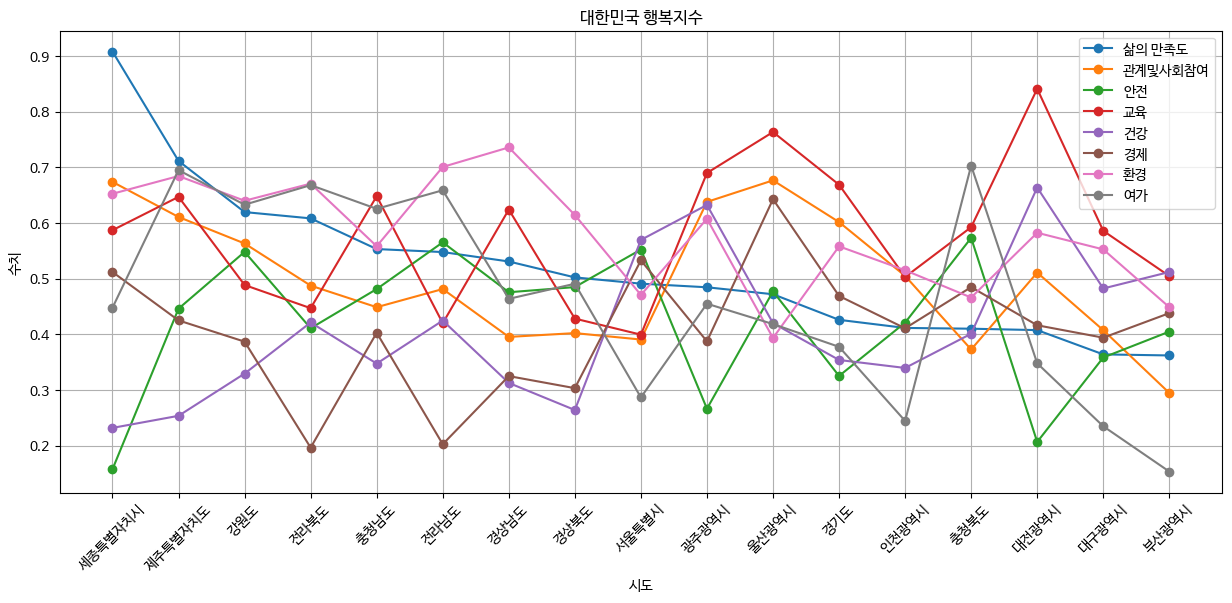

In [30]:
plt.figure(figsize=(15,6))
items = list(happy.columns[1:])
for a in items:
  plt.plot(happy[a], marker='o', label=a)
plt.xlabel('시도')
plt.ylabel('수치')
plt.xticks(range(len(happy['시도'])), happy['시도'],rotation=45)
plt.title('대한민국 행복지수')
plt.legend()
plt.grid()
plt.show()

막대그래프로 시각화

In [31]:
import numpy as np

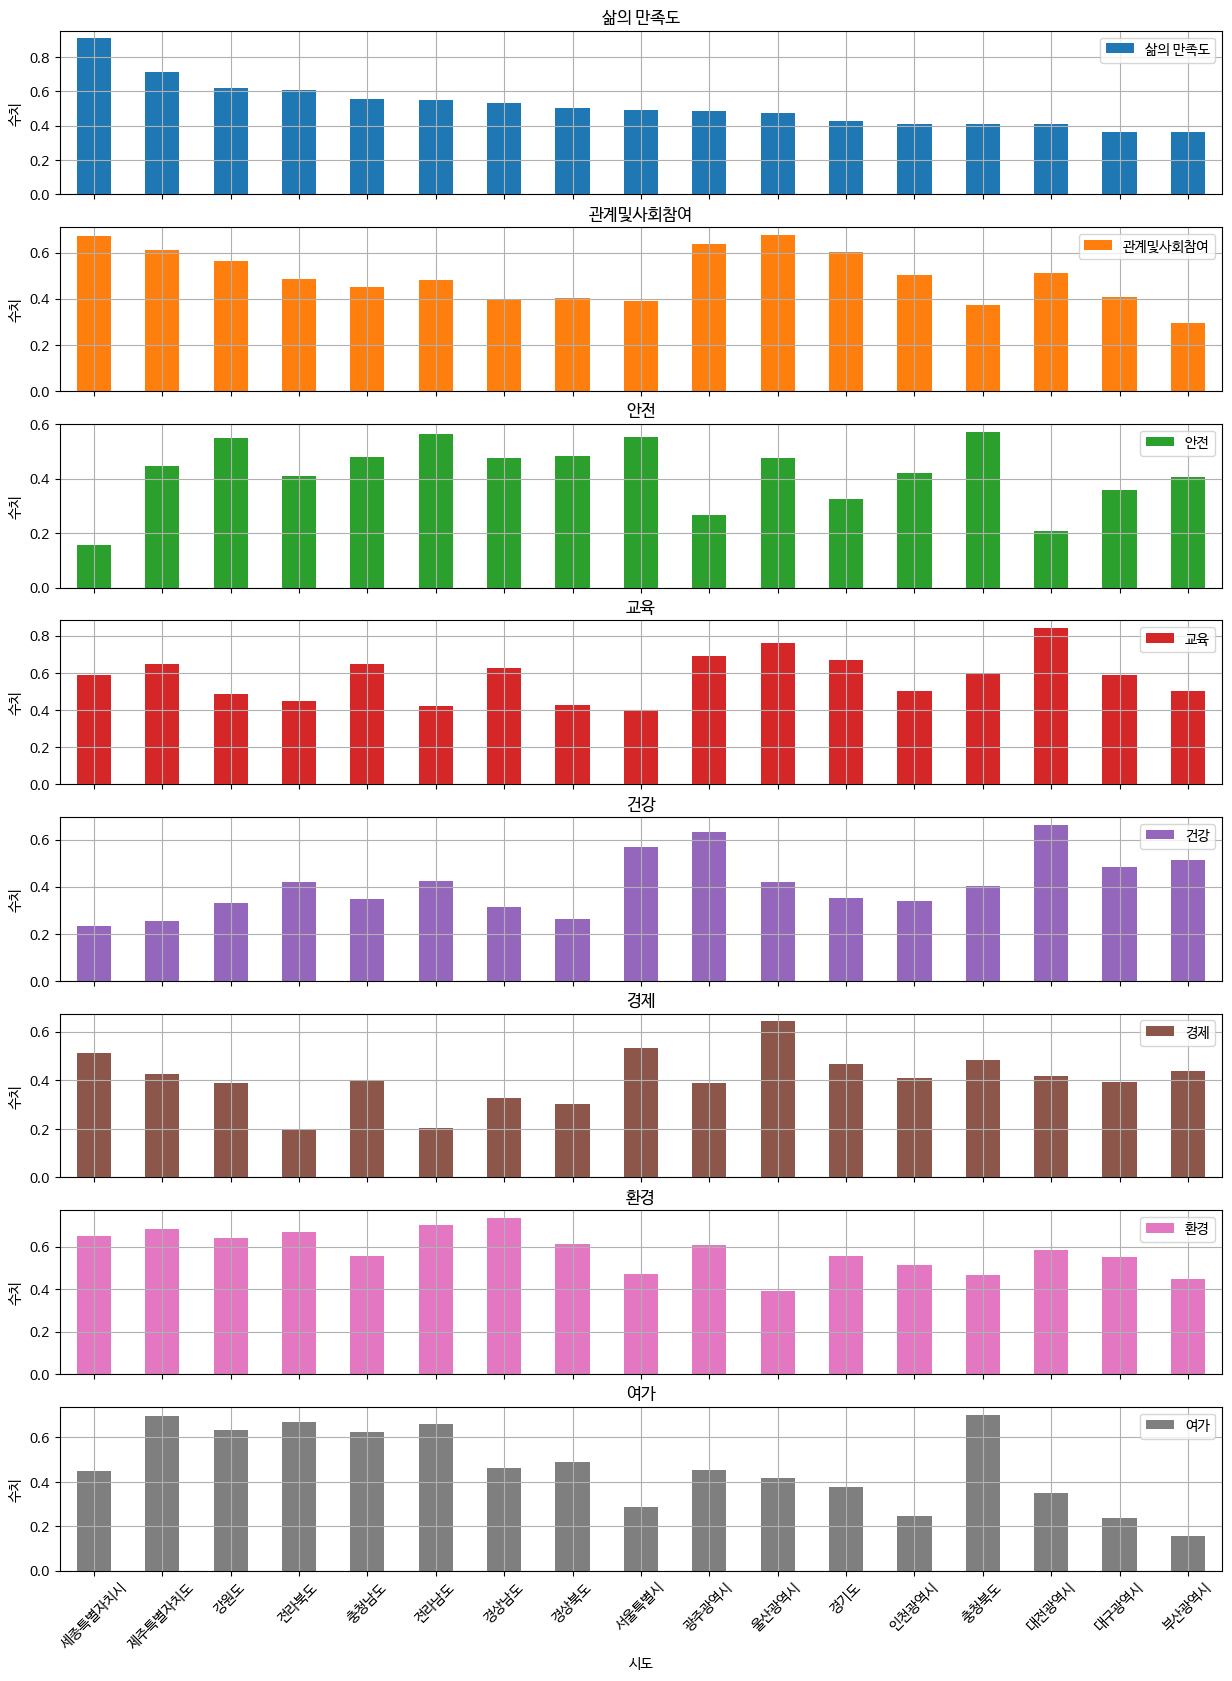

In [35]:
happy.plot(kind='bar',xlabel='시도',ylabel='수치',figsize=(15,20),grid=True,subplots=True)
plt.xticks(range(len(happy['시도'])), happy['시도'],rotation=45)
plt.show()

히트맵 그래프로 시각화

<ipython-input-37-df151da63b8e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happy_corr = happy.corr()


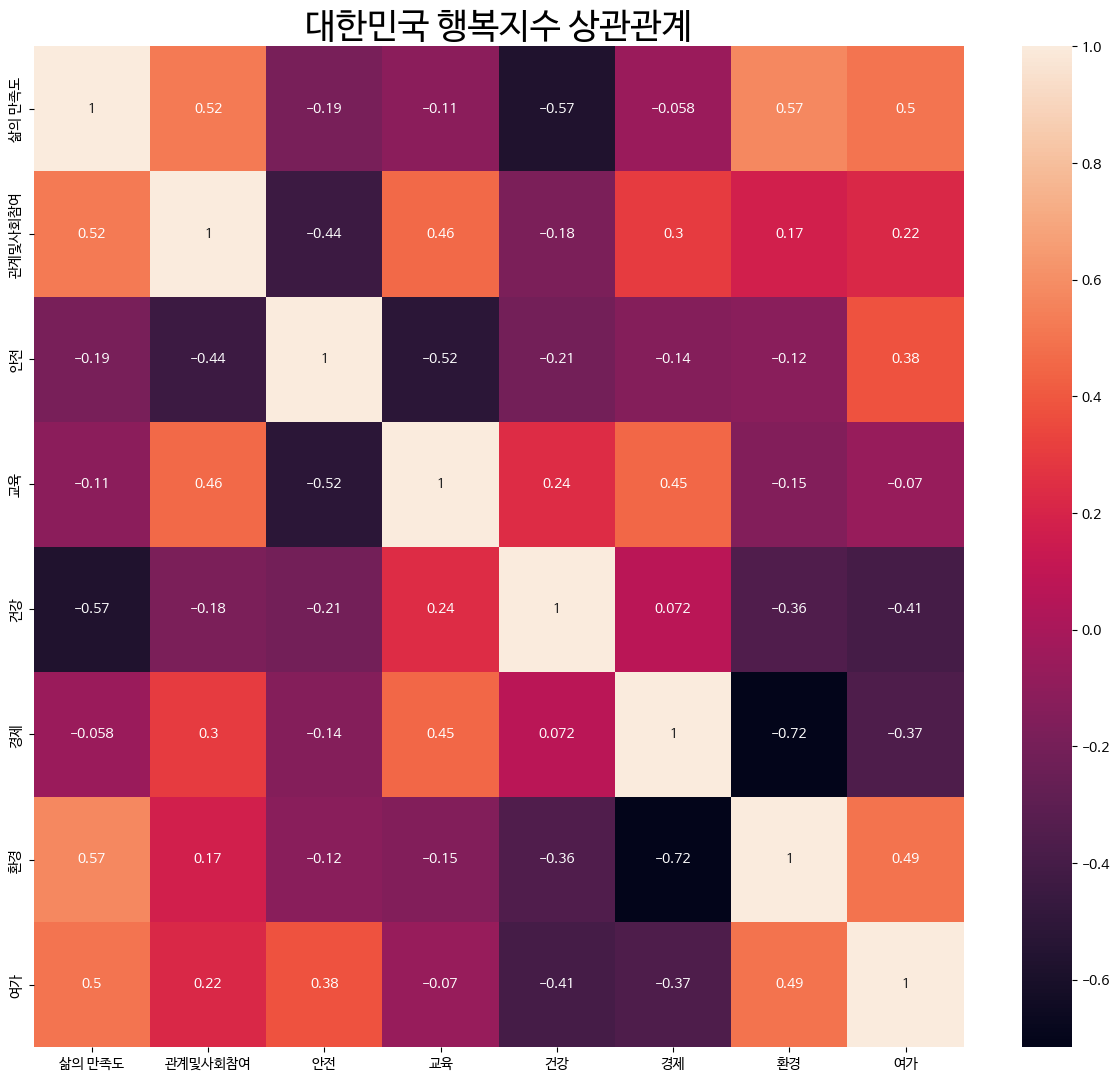

In [37]:
import seaborn as sns
plt.figure(figsize=(15,13))
plt.title('대한민국 행복지수 상관관계', fontsize=25)
plt.rc('axes',unicode_minus=False)

happy_corr = happy.corr()
sns.heatmap(happy_corr,annot=True)
plt.show()